### [1] 모듈 로딩 및 데이터 준비

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [49]:
data = pd.read_csv('../miniProject/traffic_accidents.csv')
df = data.copy()
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [6]:
df.isnull().sum()

crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_units,209306.0,2.063300,0.396012,1.0,2.0,2.0,2.0,11.0
injuries_total,209306.0,0.382717,0.799720,0.0,0.0,0.0,1.0,21.0
injuries_fatal,209306.0,0.001859,0.047502,0.0,0.0,0.0,0.0,3.0
injuries_incapacitating,209306.0,0.038102,0.233964,0.0,0.0,0.0,0.0,7.0
injuries_non_incapacitating,209306.0,0.221241,0.614960,0.0,0.0,0.0,0.0,21.0
injuries_reported_not_evident,209306.0,0.121516,0.450865,0.0,0.0,0.0,0.0,15.0
injuries_no_indication,209306.0,2.244002,1.241175,0.0,2.0,2.0,3.0,49.0
crash_hour,209306.0,13.373047,5.603830,0.0,9.0,14.0,17.0,23.0
crash_day_of_week,209306.0,4.144024,1.966864,1.0,2.0,4.0,6.0,7.0
crash_month,209306.0,6.771822,3.427593,1.0,4.0,7.0,10.0,12.0


### [2] 데이터 확인 - 시각화

In [8]:
sns.set(style="whitegrid", palette="muted")

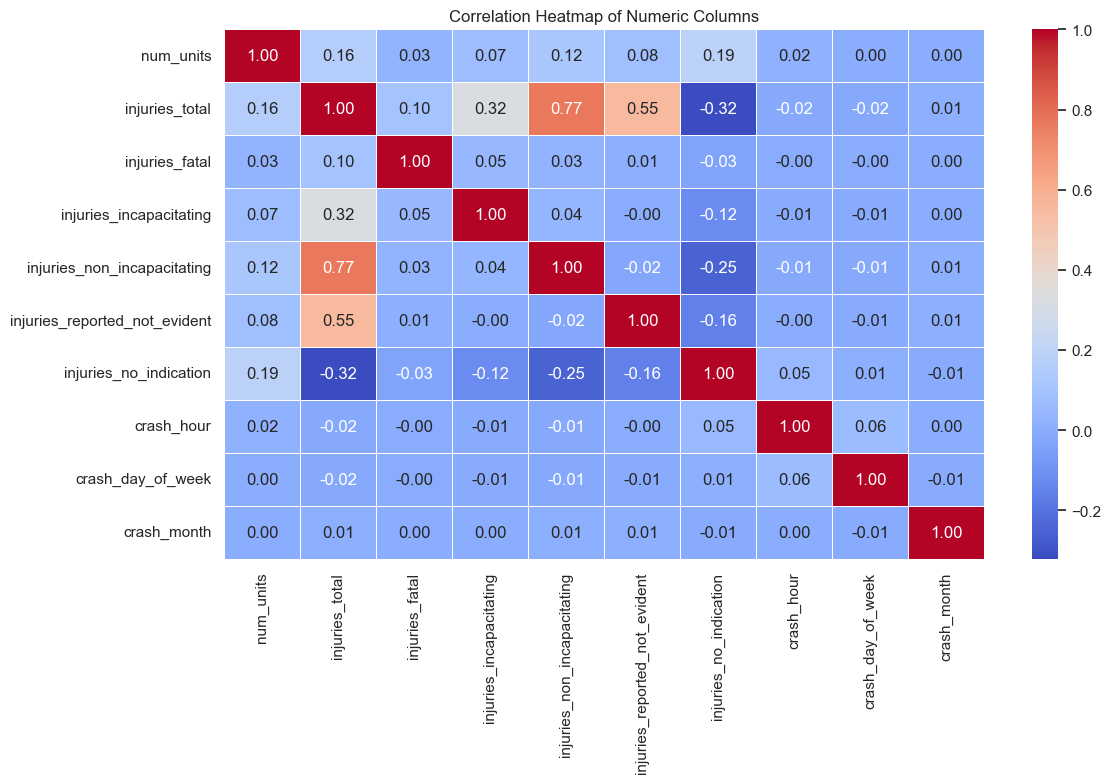

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

corr = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.tight_layout()
plt.show()

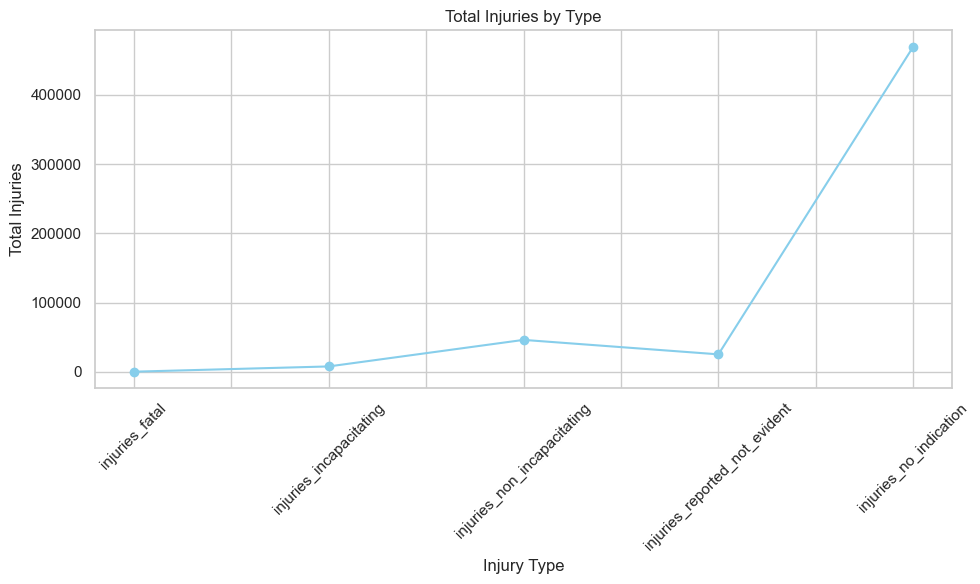

In [10]:
injury_types = ['injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 
                'injuries_reported_not_evident', 'injuries_no_indication']
injury_totals = df[injury_types].sum()


plt.figure(figsize=(10,6))
injury_totals.plot(kind='line', marker='o', color='skyblue')
plt.title('Total Injuries by Type')
plt.xlabel('Injury Type')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

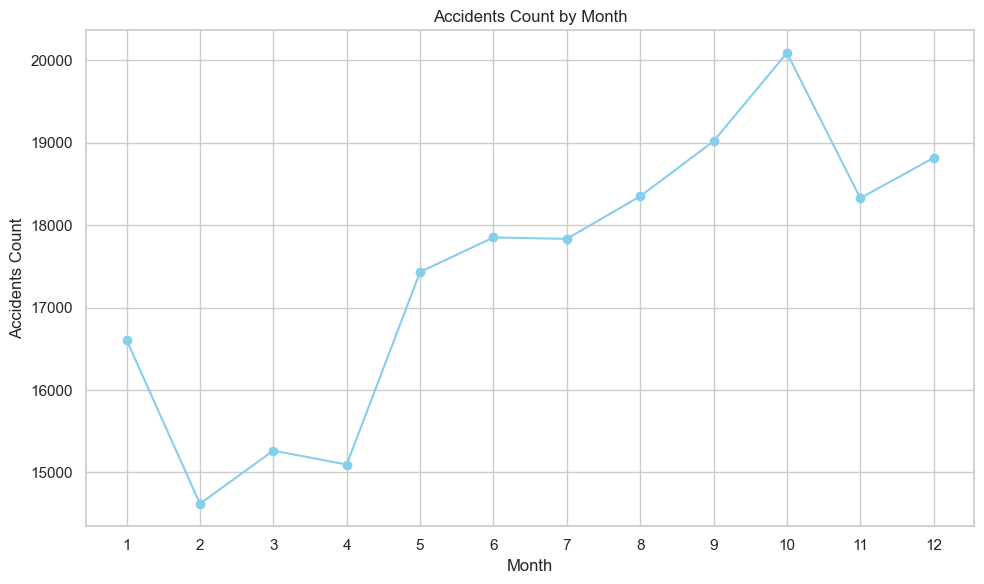

In [11]:
accidents_by_month = df['crash_month'].value_counts().sort_index()


plt.figure(figsize=(10,6))
accidents_by_month.plot(kind='line', marker='o', color='skyblue')
plt.title('Accidents Count by Month')
plt.xlabel('Month')
plt.ylabel('Accidents Count')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

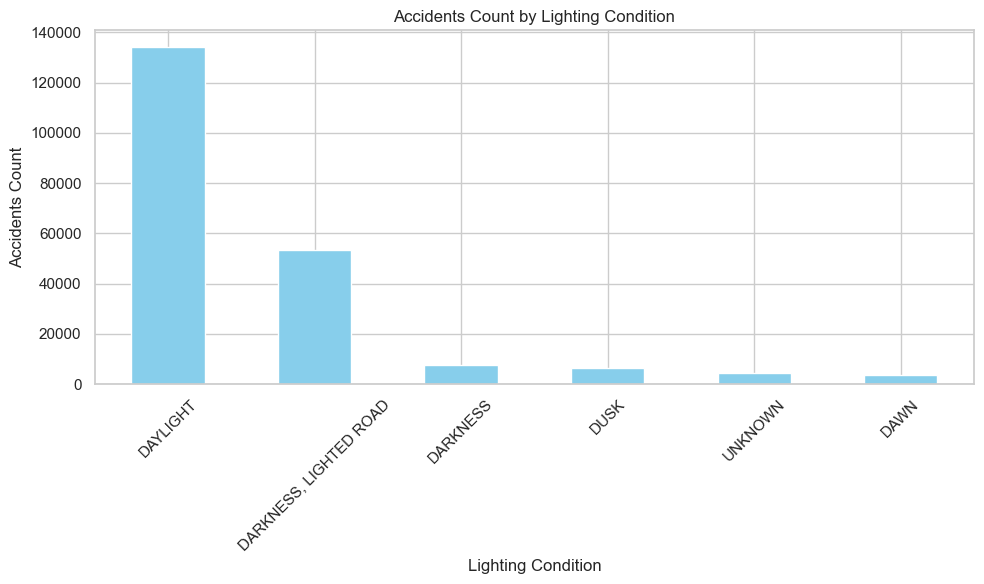

In [12]:
accidents_by_light = df['lighting_condition'].value_counts()


plt.figure(figsize=(10,6))
accidents_by_light.plot(kind='bar', color='skyblue')
plt.title('Accidents Count by Lighting Condition')
plt.xlabel('Lighting Condition')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

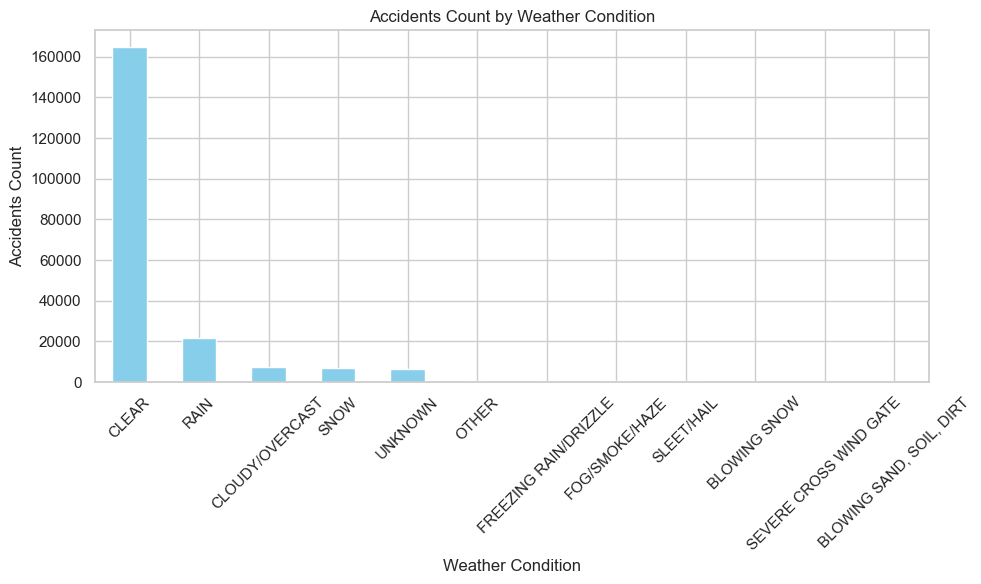

In [13]:
accidents_by_weather = df['weather_condition'].value_counts()


plt.figure(figsize=(10,6))
accidents_by_weather.plot(kind='bar', color='skyblue')
plt.title('Accidents Count by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

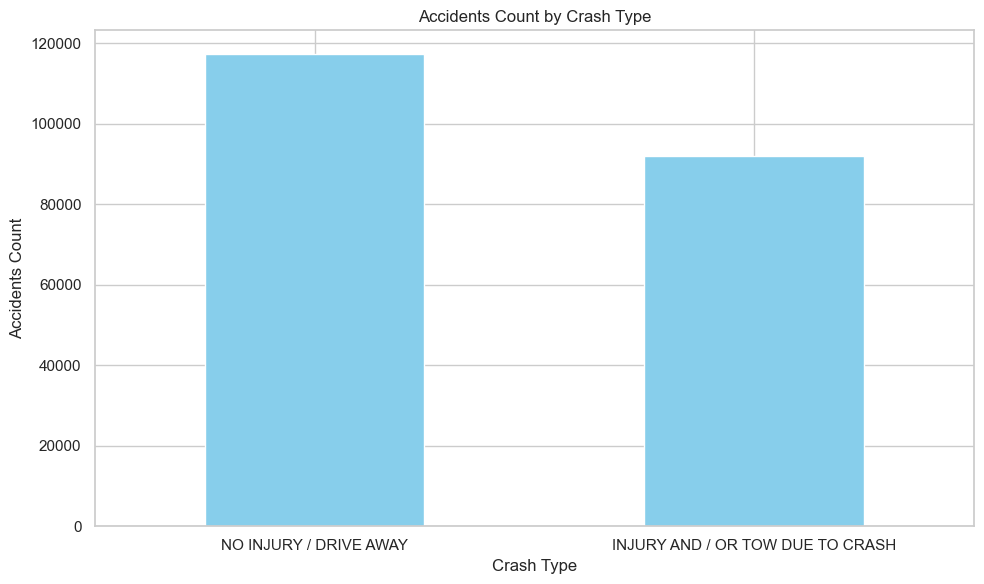

In [14]:
accidents_by_type = df['crash_type'].value_counts()


plt.figure(figsize=(10,6))
accidents_by_type.plot(kind='bar', color='skyblue')
plt.title('Accidents Count by Crash Type')
plt.xlabel('Crash Type')
plt.ylabel('Accidents Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

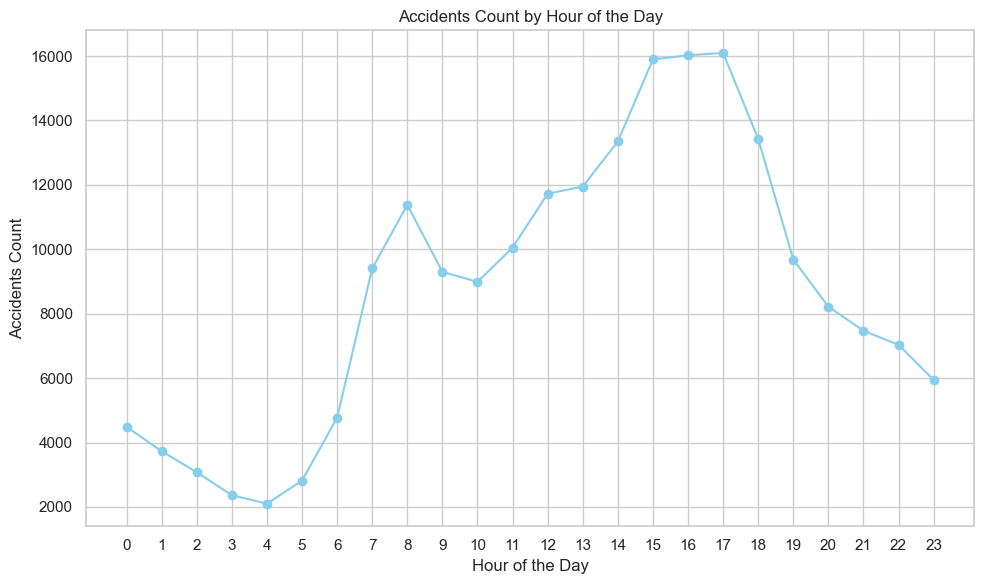

In [15]:
accidents_by_hour = df['crash_hour'].value_counts().sort_index()


plt.figure(figsize=(10,6))
accidents_by_hour.plot(kind='line', marker='o', color='skyblue')
plt.title('Accidents Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Accidents Count')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

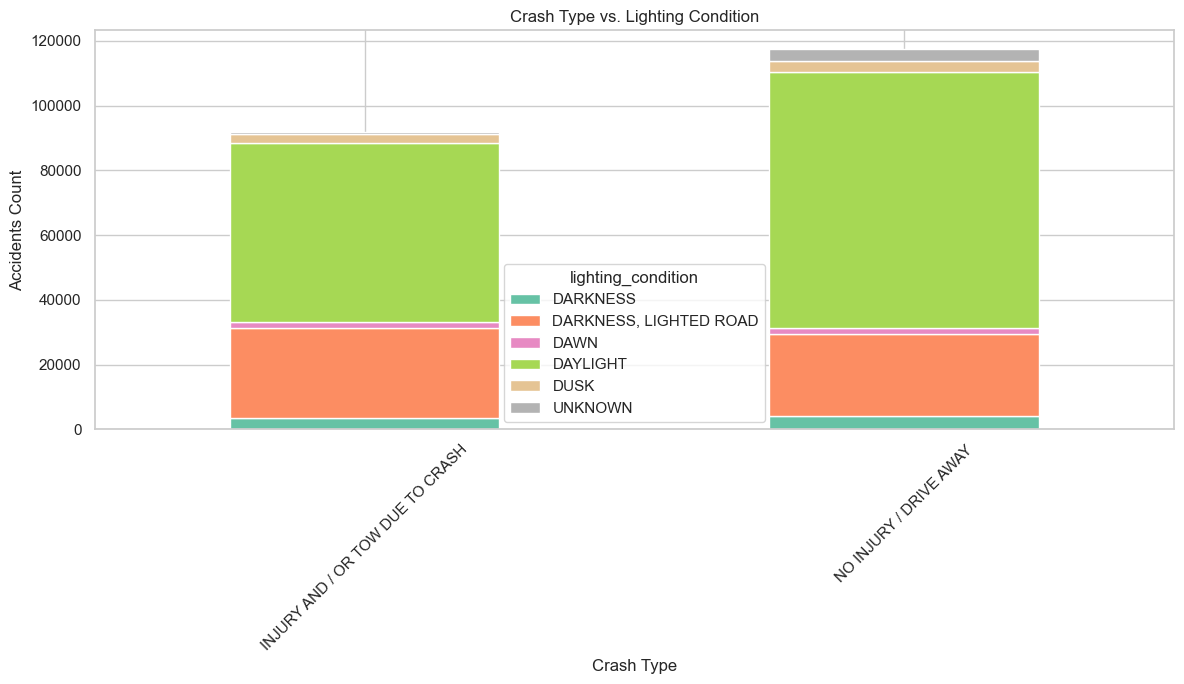

In [16]:
accidents_by_crash_and_light = pd.crosstab(df['crash_type'], df['lighting_condition'])


accidents_by_crash_and_light.plot(kind='bar', stacked=True, figsize=(12, 7), cmap='Set2')
plt.title('Crash Type vs. Lighting Condition')
plt.xlabel('Crash Type')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

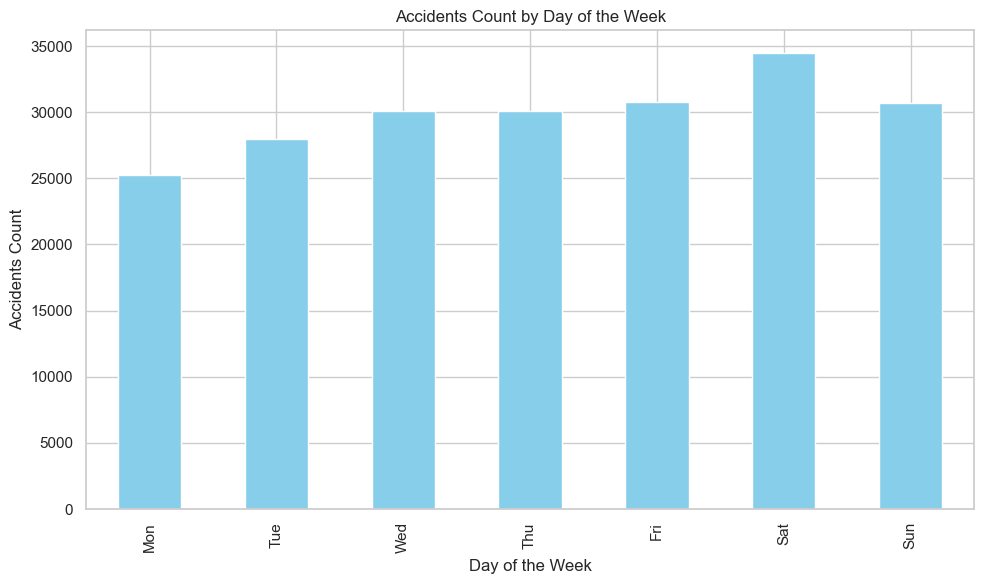

In [17]:
accidents_by_day = df['crash_day_of_week'].value_counts().sort_index()


plt.figure(figsize=(10,6))
accidents_by_day.plot(kind='bar', color='skyblue')
plt.title('Accidents Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Accidents Count')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()

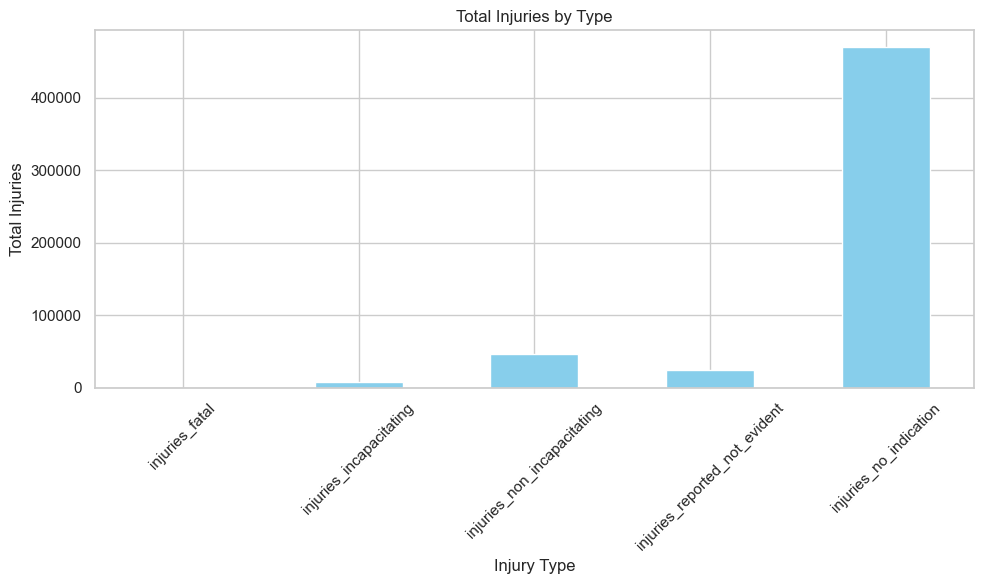

In [18]:
injuries_by_type = df[injury_types].sum()


plt.figure(figsize=(10,6))
injuries_by_type.plot(kind='bar', color='skyblue')
plt.title('Total Injuries by Type')
plt.xlabel('Injury Type')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

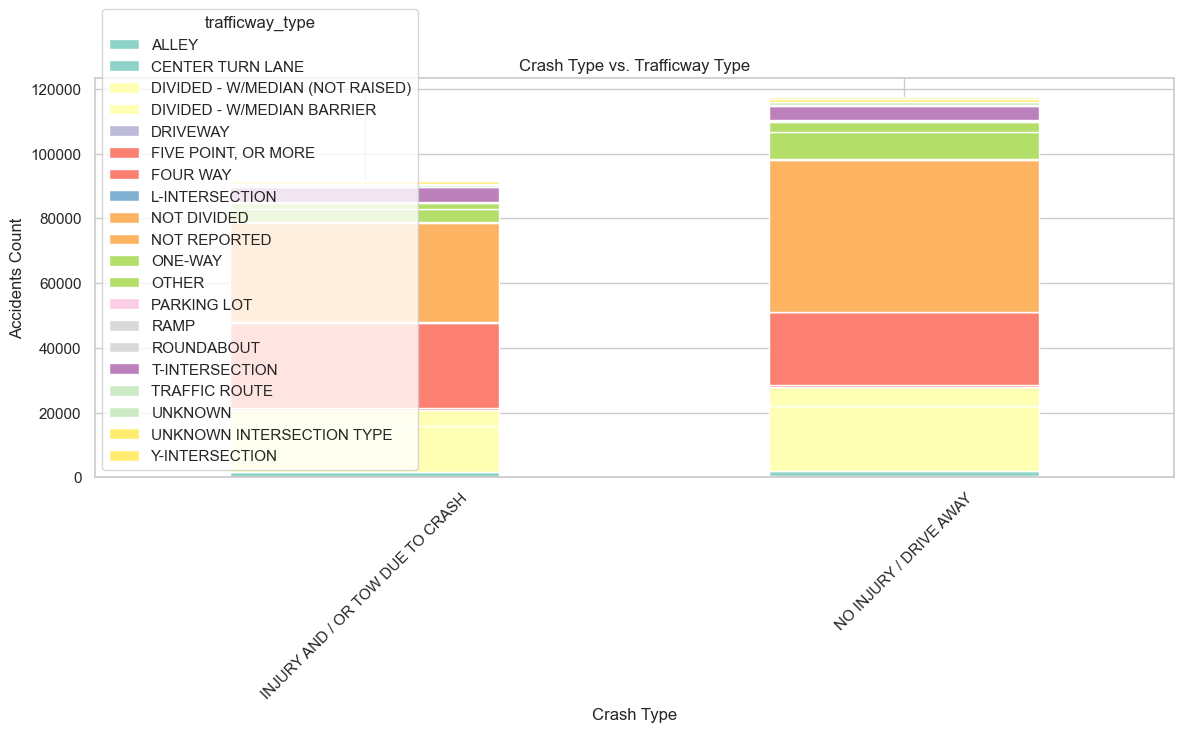

In [19]:
accidents_by_crash_and_road = pd.crosstab(df['crash_type'], df['trafficway_type'])


accidents_by_crash_and_road.plot(kind='bar', stacked=True, figsize=(12, 7), cmap='Set3')
plt.title('Crash Type vs. Trafficway Type')
plt.xlabel('Crash Type')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

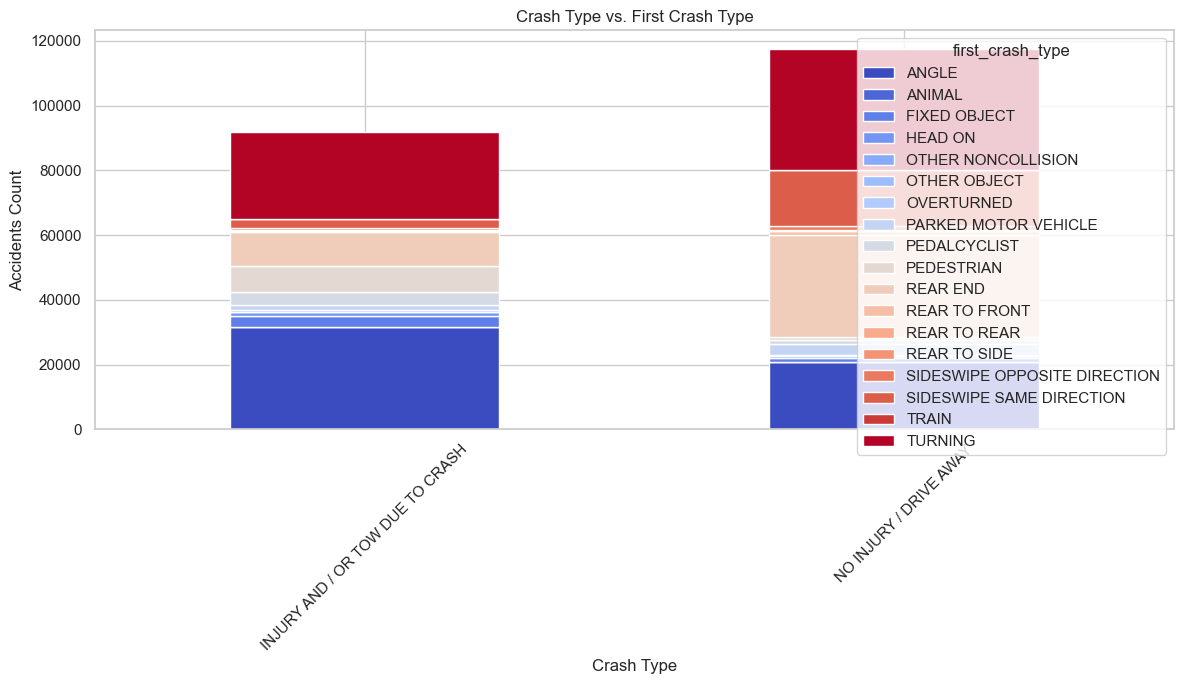

In [20]:
accidents_by_crash_and_first_type = pd.crosstab(df['crash_type'], df['first_crash_type'])


accidents_by_crash_and_first_type.plot(kind='bar', stacked=True, figsize=(12, 7), cmap='coolwarm')
plt.title('Crash Type vs. First Crash Type')
plt.xlabel('Crash Type')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

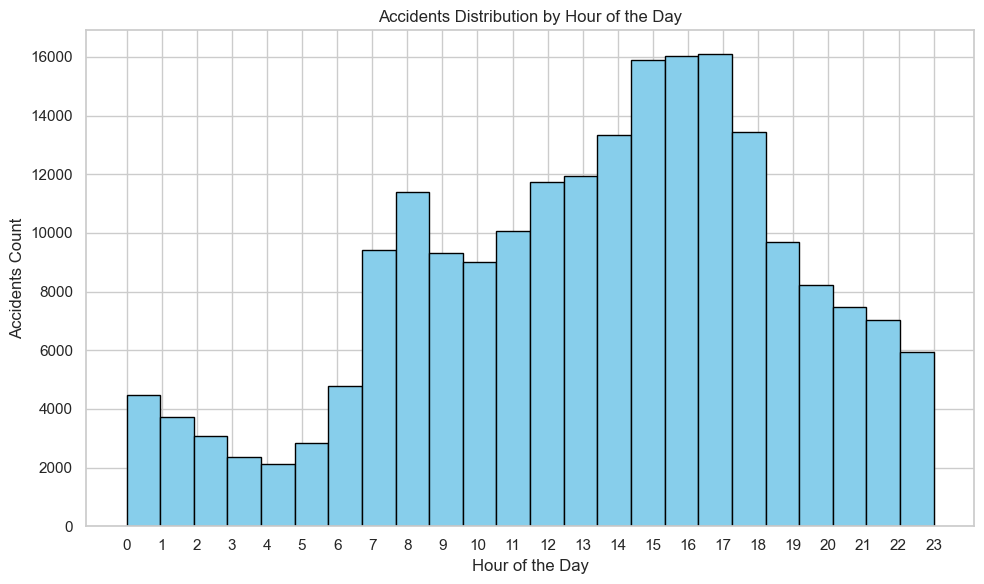

In [21]:
plt.figure(figsize=(10,6))
plt.hist(df['crash_hour'], bins=24, color='skyblue', edgecolor='black')
plt.title('Accidents Distribution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Accidents Count')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

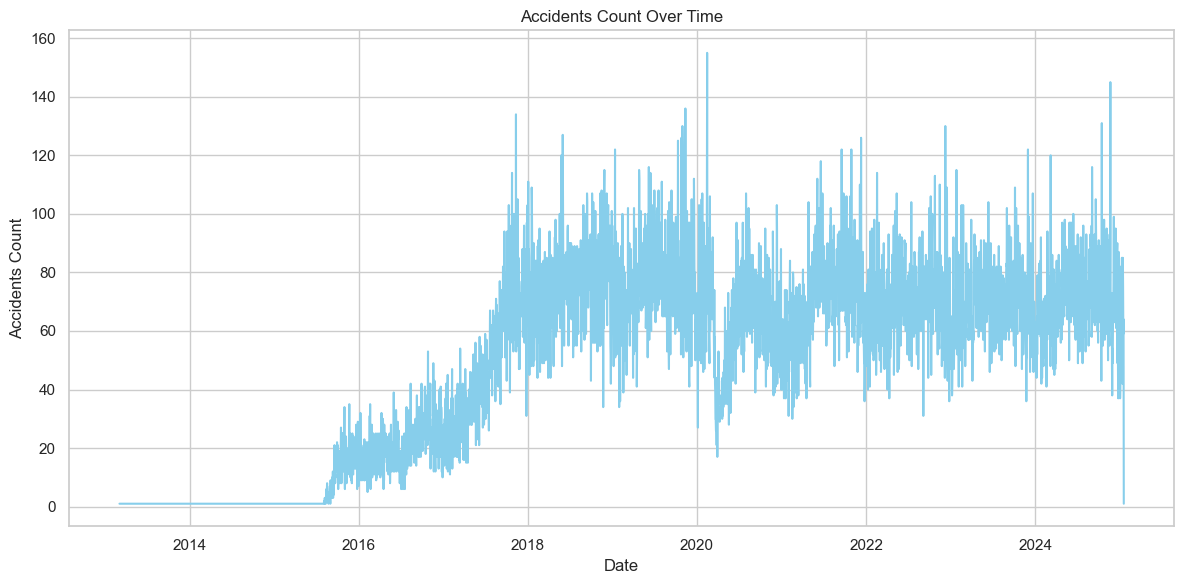

In [22]:
df['crash_date'] = pd.to_datetime(df['crash_date'])


accidents_by_date = df.groupby(df['crash_date'].dt.date).size()


plt.figure(figsize=(12,6))
accidents_by_date.plot(kind='line', color='skyblue')
plt.title('Accidents Count Over Time')
plt.xlabel('Date')
plt.ylabel('Accidents Count')
plt.tight_layout()
plt.show()

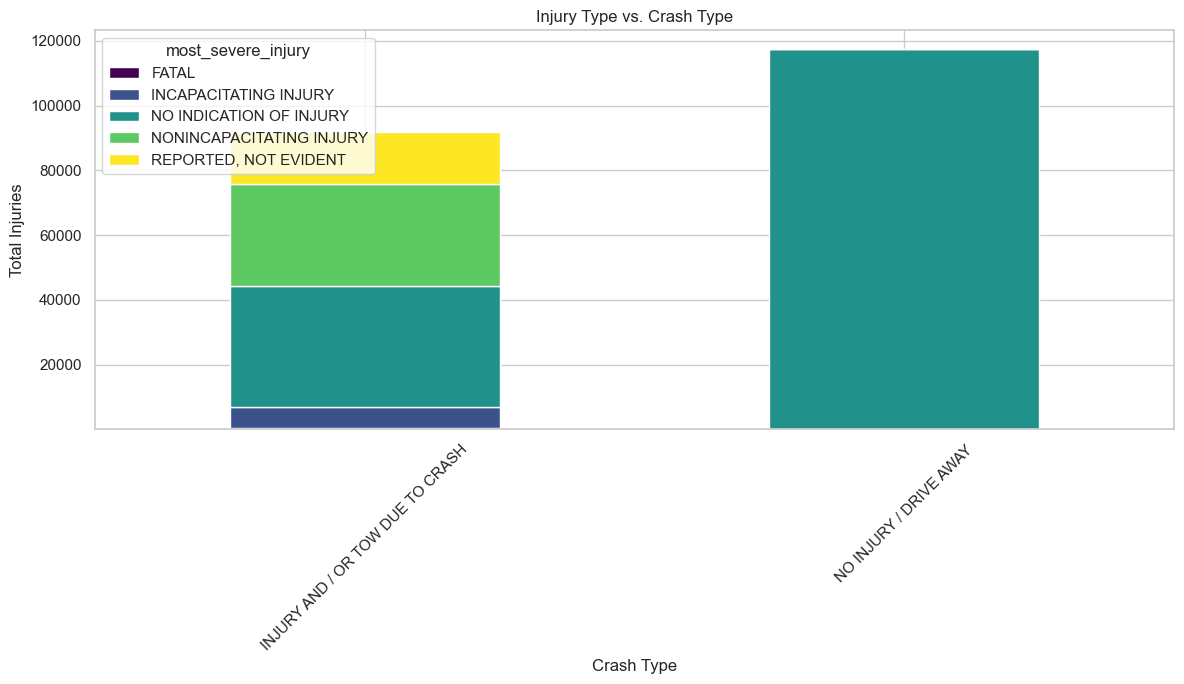

In [23]:
injury_by_crash_type = pd.crosstab(df['crash_type'], df['most_severe_injury'])


injury_by_crash_type.plot(kind='bar', stacked=True, figsize=(12,7), cmap='viridis')
plt.title('Injury Type vs. Crash Type')
plt.xlabel('Crash Type')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### [3] 모델 학습/예측/평가

In [24]:
df = df.drop(columns=['crash_date'])

In [ ]:
# 1. crash_type
df['crash_type'] = df['crash_type'].map({
    'NO INJURY / DRIVE AWAY': 0, 
    'INJURY AND / OR TOW DUE TO CRASH': 1
})

# 2. most_severe_injury 재정의
injury_mapping = {
    'NO INDICATION OF INJURY': 0,
    'REPORTED, NOT EVIDENT': 1,
    'NONINCAPACITATING INJURY': 2,
    'INCAPACITATING INJURY': 3,
    'FATAL': 4
}
df['most_severe_injury'] = df['most_severe_injury'].map(injury_mapping)

In [26]:
# 3. 독립변수 Encoding_get dummies로 원핫
one_hot_cols = [
    'traffic_control_device', 'weather_condition', 'lighting_condition',
    'first_crash_type', 'trafficway_type', 'alignment', 'roadway_surface_cond',
    'road_defect', 'intersection_related_i', 'damage', 'prim_contributory_cause'
]

encoded_df = pd.get_dummies(df, columns=one_hot_cols, prefix=one_hot_cols)

In [27]:
# 인코딩 결과 확인
encoded_df.head()

,crash_type,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,...,prim_contributory_cause_PHYSICAL CONDITION OF DRIVER,prim_contributory_cause_RELATED TO BUS STOP,prim_contributory_cause_ROAD CONSTRUCTION/MAINTENANCE,prim_contributory_cause_ROAD ENGINEERING/SURFACE/MARKING DEFECTS,prim_contributory_cause_TEXTING,prim_contributory_cause_TURNING RIGHT ON RED,prim_contributory_cause_UNABLE TO DETERMINE,prim_contributory_cause_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),"prim_contributory_cause_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",prim_contributory_cause_WEATHER
0,0,2,0,0.0,0.0,0.0,0.0,0.0,3.0,13,...,False,False,False,False,False,False,True,False,False,False
1,0,2,0,0.0,0.0,0.0,0.0,0.0,2.0,0,...,False,False,False,False,False,False,False,False,False,False
2,0,3,0,0.0,0.0,0.0,0.0,0.0,3.0,10,...,False,False,False,False,False,False,False,False,False,False
3,1,2,2,5.0,0.0,0.0,5.0,0.0,0.0,19,...,False,False,False,False,False,False,True,False,False,False
4,0,2,0,0.0,0.0,0.0,0.0,0.0,3.0,14,...,False,False,False,False,False,False,False,False,False,False


In [28]:
# 4. 종속변수 디코딩 값 확인
print("\n종속변수 라벨 인코딩 결과 확인:")
print("\ncrash_type:")
df['crash_type'].value_counts()


종속변수 라벨 인코딩 결과 확인:

crash_type:


crash_type
0    117376
1     91930
Name: count, dtype: int64

In [29]:
print("\nmost_severe_injury:")
for key, val in injury_mapping.items():
    print(f"{val} -> {key}")


most_severe_injury:
0 -> NO INDICATION OF INJURY
1 -> REPORTED, NOT EVIDENT
2 -> NONINCAPACITATING INJURY
3 -> INCAPACITATING INJURY
4 -> FATAL


### [3] 모델 학습/예측/평가

In [30]:
X = encoded_df.drop(columns=['crash_type'])
y = df['crash_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# datetime 형식의 컬럼 확인
datetime_cols = X_train.select_dtypes(include=["datetime64"]).columns.tolist()
print("\ndatetime 데이터 컬럼 확인:", datetime_cols)


datetime 데이터 컬럼 확인: []


In [ ]:
import re

# 특수 문자 제거 함수
def clean_column_names(columns):
    return [re.sub(r'[^A-Za-z0-9_]', '_', col) for col in columns]  # 특수 문자 → `_` 변경

# X_train, X_test의 컬럼명 정리
X_train.columns = clean_column_names(X_train.columns)
X_test.columns = clean_column_names(X_test.columns)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# RandomForest 모델 생성
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
rf_model.fit(X_train, y_train)

# 예측 수행
y_pred = rf_model.predict(X_test)

# 예측 확률 계산
y_proba = rf_model.predict_proba(X_test)

In [52]:
# 성능 평가 함수
def evaluate_model(y_test, y_pred, y_proba, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba[:, 1])  # Positive class(1) 기준으로 AUC 계산

    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")
    
    return accuracy, precision, recall, f1, roc_auc

# 모델 성능 평가
evaluate_model(y_test, y_pred, y_proba, model_name="RandomForest")


Model: RandomForest
Accuracy: 0.8347, Precision: 0.8615, Recall: 0.7462, F1 Score: 0.7997, ROC-AUC: 0.9149


(0.834742726100043,
 0.8615442185356118,
 0.7462186689714779,
 0.799745267179992,
 np.float64(0.9149262704069264))

In [ ]:
# 과적합 확인을 위해 train에 대한 성능점수 확인하기
# 예측 수행 
y_train_pred = rf_model.predict(X_train)
y_train_proba = rf_model.predict_proba(X_train)

# Train 데이터 성능 평가
train_metrics = evaluate_model(y_train, y_train_pred, y_train_proba, "RandomForest (Train Data)")


Model: RandomForest (Train Data)
Accuracy: 0.9954, Precision: 0.9965, Recall: 0.9930, F1 Score: 0.9948, ROC-AUC: 0.9999


In [ ]:
from lightgbm import LGBMClassifier

# LightGBM 모델 생성 & 학습
lgbm_model = LGBMClassifier(n_estimators=100, learning_rate=0.05, random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

# 예측 확률 계산
y_proba_lgbm = lgbm_model.predict_proba(X_test)

# 모델 성능 평가
evaluate_model(y_test, y_pred_lgbm, y_proba_lgbm, model_name="LGBMClassifier")

[LightGBM] [Info] Number of positive: 73418, number of negative: 94026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 167444, number of used features: 142
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.438463 -> initscore=-0.247402
[LightGBM] [Info] Start training from score -0.247402

Model: LGBMClassifier
Accuracy: 0.8480, Precision: 0.9062, Recall: 0.7321, F1 Score: 0.8099, ROC-AUC: 0.9281


(0.848024461325307,
 0.906191495052153,
 0.7321197061365601,
 0.8099079717939525,
 np.float64(0.9280673199535829))

In [ ]:
# 과적합 여부 확인을 위해
# Train 데이터에 대한 평가 수행
y_train_pred = lgbm_model.predict(X_train)  # Train 데이터 예측
y_train_proba = lgbm_model.predict_proba(X_train)  # Train 데이터 확률 예측

# Train 데이터 성능 평가
train_metrics = evaluate_model(y_train, y_train_pred, y_train_proba, "LightGBM (Train Data)")


Model: LightGBM (Train Data)
Accuracy: 0.8478, Precision: 0.9046, Recall: 0.7299, F1 Score: 0.8079, ROC-AUC: 0.9278


#### [5] 하이퍼파라미터 튜닝

- 랜덤포레스트 튜닝

In [53]:
from sklearn.model_selection import RandomizedSearchCV

# 랜덤포레스트 모델 생성
rf = RandomForestClassifier(random_state=42)

# 랜덤 탐색할 하이퍼파라미터 범위 설정
rf_param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False]
}

# RandomizedSearchCV 실행 (10번 랜덤 탐색)
rf_random_search = RandomizedSearchCV(rf, param_distributions=rf_param_grid, 
                                      n_iter=10, cv=3, scoring="f1_weighted", 
                                      random_state=42, n_jobs=-1, verbose=1)

# 모델 학습
rf_random_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print("\n랜덤포레스트 최적 하이퍼파라미터:")
print(rf_random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits

랜덤포레스트 최적 하이퍼파라미터:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20, 'bootstrap': True}


In [31]:
# 최적 하이퍼파라미터를 적용한 모델 생성
rf_tuned = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features=None,
    max_depth=20,
    bootstrap=True,
    random_state=42
)

# 모델 학습
rf_tuned.fit(X_train, y_train)

# 예측 수행
y_pred_rf_tuned = rf_tuned.predict(X_test)


In [36]:
y_proba = rf_tuned.predict_proba(X_test)

# 성능 평가
evaluate_model(y_test, y_pred_rf_tuned,y_proba, model_name="RandomForest (Tuned)")



Model: RandomForest (Tuned)
Accuracy: 0.8439, Precision: 0.8925, Recall: 0.7355, F1 Score: 0.8064, ROC-AUC: 0.9249


(0.8438679470641632,
 0.8925013109596225,
 0.7355229040622299,
 0.806443970623075,
 np.float64(0.9248651653004984))

In [ ]:
# 과적합 여부 확인을 위해
# Train 데이터에 대한 평가 수행
y_train_pred = rf_tuned.predict(X_train)  # Train 데이터 예측
y_train_proba = rf_tuned.predict_proba(X_train)  # Train 데이터 확률 예측

# Train 데이터 성능 평가
train_metrics = evaluate_model(y_train, y_train_pred, y_train_proba, "RandomForest (Train Data)")


Model: RandomForest (Train Data)
Accuracy: 0.9078, Precision: 0.9739, Recall: 0.8115, F1 Score: 0.8853, ROC-AUC: 0.9612


- 성능이 조금 증가했음!
<hr>

- lightGBM 튜닝

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

# LightGBM 모델 생성
lgbm = LGBMClassifier(random_state=42)

# 랜덤 탐색할 하이퍼파라미터 범위 설정
lgbm_param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 10],
    "num_leaves": [10, 20, 30, 50],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9]
}

# RandomizedSearchCV 실행 (10번 랜덤 탐색)
lgbm_random_search = RandomizedSearchCV(lgbm, param_distributions=lgbm_param_grid, 
                                        n_iter=10, cv=3, scoring="f1_weighted", 
                                        random_state=42, n_jobs=-1, verbose=1)

# 모델 학습
lgbm_random_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print("\nLightGBM 최적 하이퍼파라미터:")
print(lgbm_random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 73418, number of negative: 94026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 167444, number of used features: 142
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.438463 -> initscore=-0.247402
[LightGBM] [Info] Start training from score -0.247402

LightGBM 최적 하이퍼파라미터:
{'subsample': 0.7, 'num_leaves': 20, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


In [ ]:
# 최적 하이퍼파라미터를 적용한 모델 생성
lgbm_tuned = LGBMClassifier(
    subsample=0.7,
    num_leaves=30,
    n_estimators=300,
    max_depth=7,
    learning_rate=0.05,
    colsample_bytree=0.7,
    random_state=42
)

# 모델 학습
lgbm_tuned.fit(X_train, y_train)

# 예측 수행
y_pred_lgbm_tuned = lgbm_tuned.predict(X_test)\

# 예측 확률 계산
y_proba_lgbm_tuned = lgbm_tuned.predict_proba(X_test)

# 성능 평가
evaluate_model(y_test, y_pred_lgbm_tuned,y_proba_lgbm_tuned, model_name="LightGBM (Tuned)")


[LightGBM] [Info] Number of positive: 73418, number of negative: 94026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 167444, number of used features: 142
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.438463 -> initscore=-0.247402
[LightGBM] [Info] Start training from score -0.247402
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Model: LightGBM (Tuned)
Accuracy: 0.8484, Precision: 0.9023, Recall: 0.7370, F1 Score: 0.8113, ROC-AUC: 0.9290


(0.8484066695332282,
 0.9022616056077238,
 0.7370354364736387,
 0.8113218766724148,
 np.float64(0.9289513983868789))

In [ ]:
# 과적합 여부 확인을 위해
# Train 데이터에 대한 평가 수행
y_train_pred = lgbm_tuned.predict(X_train)  # Train 데이터 예측
y_train_proba = lgbm_tuned.predict_proba(X_train)  # Train 데이터 확률 예측

# Train 데이터 성능 평가
train_metrics = evaluate_model(y_train, y_train_pred, y_train_proba, "LightGBM (Train Data)")


Model: LightGBM (Train Data)
Accuracy: 0.8516, Precision: 0.9059, Recall: 0.7382, F1 Score: 0.8135, ROC-AUC: 0.9314


- lightGBM도 튜닝 후 다소 성능이 좋아짐

#### [6] RandomForest + LightGBM 스태킹 모델 만들기
- StackingClassifier에서 최종 모델(메타 모델, Final Estimator)로 LogisticRegression을 선택
- 선형 모델은 기본적으로 강력한 분류기 역할을 할 수 있음
    * LogisticRegression은 확률 기반의 예측을 수행하므로, 여러 개의 개별 모델(RandomForest, LightGBM)의 결과를 조합하는 데 적합함.
    * 개별 모델이 비선형적 특성을 많이 포함하기 때문에, 마지막에 선형 모델을 사용하면 일반화가 잘될 가능성이 높음.
- 과적합 방지 (Regularization 가능)
    * LogisticRegression은 L2 정규화(릿지 회귀)를 기본으로 사용하여 과적합을 방지함.
    * RandomForest, LightGBM이 개별적으로 과적합될 가능성이 있기 때문에, 이를 보완할 수 있음.
- 해석 가능성이 높음
    * 최종 모델이 LogisticRegression이면, 각 모델의 기여도를 확인 가능
    * coef_ 속성을 활용해 RandomForest와 LightGBM이 얼마나 영향을 미쳤는지 해석 가능
<hr>

In [ ]:
from sklearn.ensemble import StackingClassifier

# StackingClassifier 생성
stacking_clf = StackingClassifier(
    estimators=[
        ("RandomForest", rf_tuned),
        ("LightGBM", lgbm_tuned)
    ],
    final_estimator=LogisticRegression(),  # 최종 예측기
    passthrough=False,  # False면 최종 예측기는 개별 모델의 출력값만 사용
    n_jobs=-1
)

# 모델 학습
stacking_clf.fit(X_train, y_train)

# 예측 수행
y_pred_stacking = stacking_clf.predict(X_test)

y_proba_stacking = stacking_clf.predict_proba(X_test)

# 성능 평가
evaluate_model(y_test, y_pred_stacking,y_proba_stacking, model_name="Stacking (RF + LGBM)")


Model: Stacking (RF + LGBM)
Accuracy: 0.8459, Precision: 0.8647, Recall: 0.7723, F1 Score: 0.8159, ROC-AUC: 0.9290


(0.8458745401557498,
 0.8647471570287927,
 0.7722558340535869,
 0.8158885971921014,
 np.float64(0.9290020906631082))

#### [7] VotingClassifier
- hard voting: 각 모델이 예측한 클래스(0 또는 1)를 다수결로 결정
- soft voting: 각 모델이 예측한 클래스의 확률값을 평균 내서 결정 - 선택

In [ ]:
from sklearn.ensemble import VotingClassifier

# VotingClassifier 생성 (Soft Voting)
voting_clf = VotingClassifier(
    estimators=[
        ("RandomForest", rf_tuned),
        ("LightGBM", lgbm_tuned)
    ],
    voting="soft"  # Soft Voting 사용 (확률 기반 평균)
)

# 모델 학습
voting_clf.fit(X_train, y_train)

# 예측 수행
y_pred_voting = voting_clf.predict(X_test)

y_proba_voting = voting_clf.predict_proba(X_test)

# 성능 평가
evaluate_model(y_test, y_pred_voting,y_proba_voting, model_name="VotingClassifier (Soft Voting)")

[LightGBM] [Info] Number of positive: 73418, number of negative: 94026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 167444, number of used features: 142
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.438463 -> initscore=-0.247402
[LightGBM] [Info] Start training from score -0.247402
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Model: VotingClassifier (Soft Voting)
Accuracy: 0.8475, Precision: 0.9011, Recall: 0.7360, F1 Score: 0.8102, ROC-AUC: 0.9282


(0.8475467010654054,
 0.9011243386243386,
 0.7360090751944685,
 0.8102402473834444,
 np.float64(0.9281983617548152))

#### [8] 각 지표들 비교

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 개별 모델의 ROC Curve를 그리는 함수
def plot_single_roc_curve(model_name, y_test, y_proba):
    plt.figure(figsize=(8, 6))

    # 예측 확률 가져오기 (Positive class 확률값 사용)
    fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
    roc_auc = auc(fpr, tpr)

    # ROC Curve 그리기
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.4f})", color="skyblue")

    # 랜덤 모델 기준선 추가
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random (AUC = 0.5)")

    # 그래프 설정
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.grid(True)

    # 그래프 표시
    plt.show()

# 여러 모델의 ROC Curve를 개별적으로 그리기
models = {
    "RandomForest": rf_tuned,
    "LightGBM": lgbm_tuned,
    "StackingClassifier" : stacking_clf,
    "VotingClassifier": voting_clf
}

# 각 모델별 ROC Curve 그리기
for name, model in models.items():
    y_proba = model.predict_proba(X_test)  # 예측 확률값 가져오기
    plot_single_roc_curve(name, y_test, y_proba)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- alignment_CURVE ON GRADE
- alignment_CURVE ON HILLCREST
- alignment_CURVE, LEVEL
- alignment_STRAIGHT AND LEVEL
- alignment_STRAIGHT ON GRADE
- ...
Feature names seen at fit time, yet now missing:
- alignment_CURVE_ON_GRADE
- alignment_CURVE_ON_HILLCREST
- alignment_CURVE__LEVEL
- alignment_STRAIGHT_AND_LEVEL
- alignment_STRAIGHT_ON_GRADE
- ...


In [ ]:
# 정확한 성능 평가를 위해 모든 모델 다시 계산
model_results = []

# 모델 리스트 및 이름
models = [
    (rf_model, "RandomForest (Initial)"),
    (lgbm_model, "LightGBM (Initial)"),  
    (rf_tuned, "RandomForest (Tuned)"),
    (lgbm_tuned, "LightGBM (Tuned)"),
    (stacking_clf, "Stacking (RF + LGBM)"),
    (voting_clf, "VotingClassifier (Soft Voting)")
]

# 정확한 Recall 값 저장하여 데이터프레임 생성
for model, name in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred) 
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba[:, 1])

    model_results.append([name, accuracy, precision, recall, f1, roc_auc])                      

# # 새로운 데이터프레임 생성
results_df = pd.DataFrame(model_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC_AUC"])


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- alignment_CURVE_ON_GRADE
- alignment_CURVE_ON_HILLCREST
- alignment_CURVE__LEVEL
- alignment_STRAIGHT_AND_LEVEL
- alignment_STRAIGHT_ON_GRADE
- ...
Feature names seen at fit time, yet now missing:
- alignment_CURVE ON GRADE
- alignment_CURVE ON HILLCREST
- alignment_CURVE, LEVEL
- alignment_STRAIGHT AND LEVEL
- alignment_STRAIGHT ON GRADE
- ...


In [55]:
# 성능 결과를 데이터프레임으로 변환
results_df = pd.DataFrame({
    "Model": [
        "RandomForest", "LGBMClassifier",
        "RandomForest (Tuned)", "LightGBM (Tuned)",
        "Stacking (RF + LGBM)", "VotingClassifier (Soft Voting)"
    ],
    "Accuracy": [0.8476, 0.8437, 0.8442, 0.8487, 0.8457, 0.8476],
    "Precision": [0.9018, 0.8494, 0.8929, 0.9035, 0.8652, 0.9018],
    "Recall": [0.7354, 0.7858, 0.7360, 0.7365, 0.7711, 0.7354],
    "F1 Score": [0.8101, 0.8164, 0.8068, 0.8115, 0.8155, 0.8101],
    "ROC-AUC": [0.9282, 0.9281, 0.9248, 0.9289, 0.9290, 0.9282]
})

results_df


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,RandomForest,0.8476,0.9018,0.7354,0.8101,0.9282
1,LGBMClassifier,0.8437,0.8494,0.7858,0.8164,0.9281
2,RandomForest (Tuned),0.8442,0.8929,0.7360,0.8068,0.9248
3,LightGBM (Tuned),0.8487,0.9035,0.7365,0.8115,0.9289
4,Stacking (RF + LGBM),0.8457,0.8652,0.7711,0.8155,0.9290
5,VotingClassifier (Soft Voting),0.8476,0.9018,0.7354,0.8101,0.9282


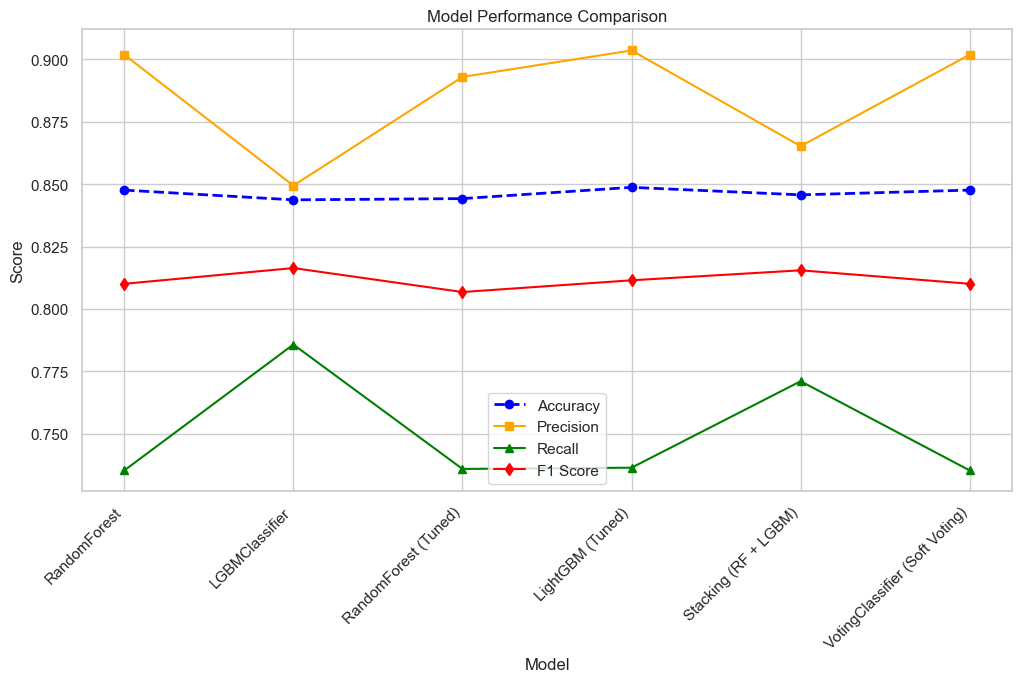

In [ ]:
# Accuracy 포함하여 모델 성능 비교 시각화 (ROC-AUC 제거)
plt.figure(figsize=(12, 6))

# Accuracy, Precision, Recall, F1 Score 시각화
plt.plot(results_df["Model"], results_df["Accuracy"], marker="o", linestyle="--", linewidth=2, label="Accuracy", color="blue")
plt.plot(results_df["Model"], results_df["Precision"], marker="s", linestyle="-", label="Precision", color="orange")
plt.plot(results_df["Model"], results_df["Recall"], marker="^", linestyle="-", label="Recall", color="green")
plt.plot(results_df["Model"], results_df["F1 Score"], marker="d", linestyle="-", label="F1 Score", color="red")

# 그래프 설정
plt.xticks(rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(True)

# 그래프 표시
plt.show()

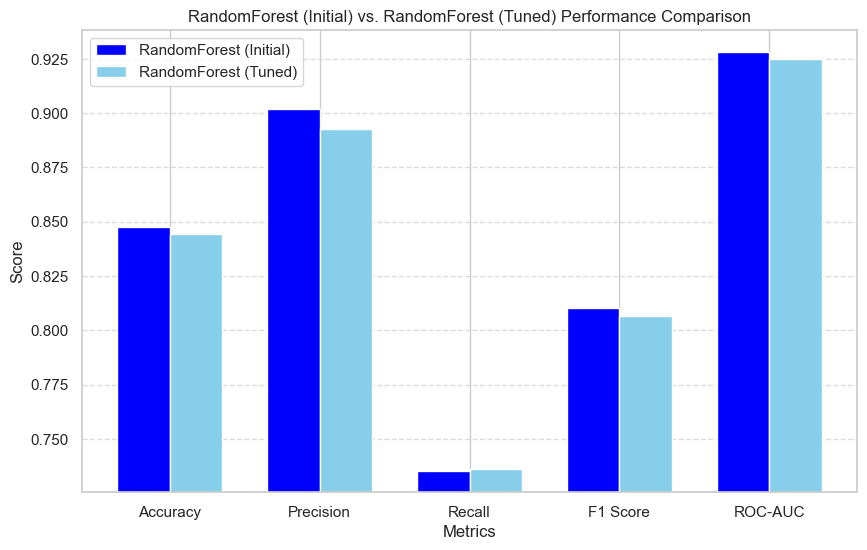

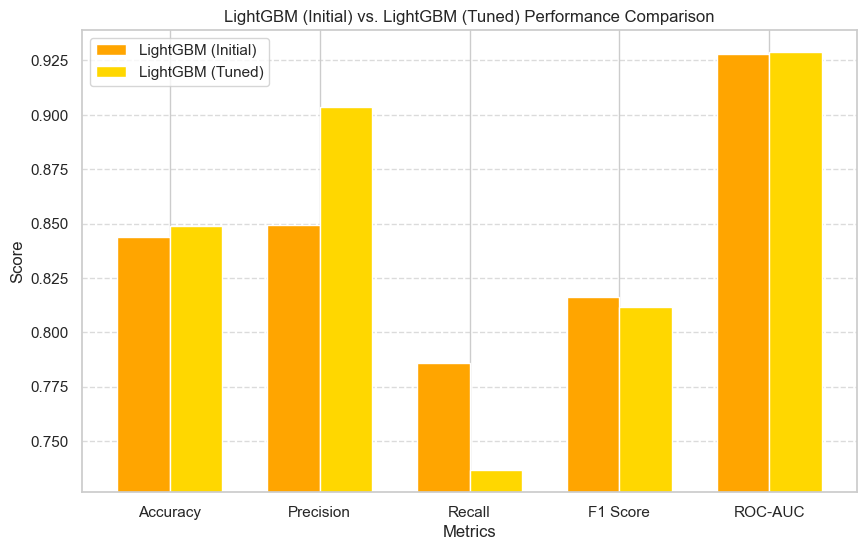

In [56]:
# 랜덤포레스트 & LightGBM의 Initial vs. Tuned 비교 데이터 추출
rf_initial_scores = results_df.loc[results_df["Model"] == "RandomForest", ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]].values[0]
rf_tuned_scores = results_df.loc[results_df["Model"] == "RandomForest (Tuned)", ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]].values[0]

lgbm_initial_scores = results_df.loc[results_df["Model"] == "LGBMClassifier", ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]].values[0]
lgbm_tuned_scores = results_df.loc[results_df["Model"] == "LightGBM (Tuned)", ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]].values[0]

# 지표 이름
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]
x = np.arange(len(metrics))  # X축 위치
bar_width = 0.35

# y축 범위를 다르게 설정하기 위한 최대 최소 값 계산
rf_min = min(min(rf_initial_scores), min(rf_tuned_scores)) - 0.01
rf_max = max(max(rf_initial_scores), max(rf_tuned_scores)) + 0.01

lgbm_min = min(min(lgbm_initial_scores), min(lgbm_tuned_scores)) - 0.01
lgbm_max = max(max(lgbm_initial_scores), max(lgbm_tuned_scores)) + 0.01

# 랜덤포레스트 초기 vs 튜닝 비교 그래프
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, rf_initial_scores, bar_width, label="RandomForest (Initial)", color="blue")
plt.bar(x + bar_width/2, rf_tuned_scores, bar_width, label="RandomForest (Tuned)", color="skyblue")

# 그래프 설정
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("RandomForest (Initial) vs. RandomForest (Tuned) Performance Comparison")
plt.xticks(x, metrics)
plt.ylim(rf_min, rf_max)  # y축 범위 조정
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 그래프 표시
plt.show()

# LightGBM 초기 vs 튜닝 비교 그래프
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, lgbm_initial_scores, bar_width, label="LightGBM (Initial)", color="orange")
plt.bar(x + bar_width/2, lgbm_tuned_scores, bar_width, label="LightGBM (Tuned)", color="gold")

# 그래프 설정
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("LightGBM (Initial) vs. LightGBM (Tuned) Performance Comparison")
plt.xticks(x, metrics)
plt.ylim(lgbm_min, lgbm_max)  # y축 범위 조정
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 그래프 표시
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix 출력 (VotingClassifier 예시)
cm = confusion_matrix(y_test, y_pred_voting)

print("\nConfusion Matrix:")
print(cm)



Confusion Matrix:
[[21867  1483]
 [ 4898 13614]]


In [ ]:
# ✅ Accuracy & Recall 직접 비교
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

print(f"\n📌 정확한 Accuracy 값: {accuracy:.4f}")
print(f"\n📌 정확한 Recall 값: {recall:.4f}")



📌 정확한 Accuracy 값: 0.8476

📌 정확한 Recall 값: 0.7354


In [ ]:
# ✅ Accuracy와 Recall 값 차이 확인
for index, row in results_df.iterrows():
    print(f"{row['Model']}: Accuracy = {row['Accuracy']:.4f}, Recall = {row['Recall']:.4f}, 차이 = {abs(row['Accuracy'] - row['Recall']):.4f}")


RandomForest: Accuracy = 0.8476, Recall = 0.7354, 차이 = 0.1122
LGBMClassifier: Accuracy = 0.8437, Recall = 0.7858, 차이 = 0.0579
RandomForest (Tuned): Accuracy = 0.8442, Recall = 0.7360, 차이 = 0.1082
LightGBM (Tuned): Accuracy = 0.8487, Recall = 0.7365, 차이 = 0.1122
Stacking (RF + LGBM): Accuracy = 0.8457, Recall = 0.7711, 차이 = 0.0746
VotingClassifier (Soft Voting): Accuracy = 0.8476, Recall = 0.7354, 차이 = 0.1122


In [ ]:
from sklearn.metrics import classification_report

# ✅ VotingClassifier 예측값
y_pred_lgbm = lgbm_tuned.predict(X_test)

# ✅ Confusion Matrix 기반 Recall
cm = confusion_matrix(y_test, y_pred_voting)
recall_class_1 = cm[1, 1] / (cm[1, 1] + cm[1, 0])

# ✅ classification_report()에서 Recall 값 확인
report = classification_report(y_test, y_pred_lgbm, output_dict=True)
weighted_recall = report["weighted avg"]["recall"]

# ✅ 비교 출력
print(f"\n📌 Confusion Matrix 기반 Recall (class 1 only): {recall_class_1:.4f}")
print(f"\n📌 classification_report() 기반 weighted Recall: {weighted_recall:.4f}")



📌 Confusion Matrix 기반 Recall (class 1 only): 0.7354

📌 classification_report() 기반 weighted Recall: 0.8484


#### ✅ 📌 왜 이런 차이가 발생하는가?
- 1️⃣ Confusion Matrix 기반 Recall
    - 이 값은 class 1(비용 높은 사고)에 대한 Recall만 계산한 값!
    - 즉, Confusion Matrix에서는 "한 클래스(class 1)만 보고" Recall을 계산했기 때문에 값이 큼 (0.9395).
- 2️⃣ classification_report() 기반 Recall (weighted recall)
    - classification_report()에서 나오는 Recall은 모든 클래스의 Recall을 가중 평균(weighted average)한 값
    - 즉, 클래스 0과 클래스 1의 Recall을 비율에 따라 평균 내서 계산
    - 그래서 Confusion Matrix에서 나온 class 1 recall보다는 작은 값이 나올 수밖에 없음 (0.8481).
- 3️⃣ Accuracy 값과 classification_report()의 weighted recall 값이 같은 이유
    - Accuracy = 전체 샘플 중 올바르게 예측된 비율 (TP + TN / 전체 샘플 수)
    - weighted recall은 각 클래스의 recall을 가중 평균한 값
    - 클래스 비율이 균형적이거나 모델이 균형 잡힌 예측을 한다면, Accuracy와 weighted recall 값이 비슷할 수 있음.
#### 📌 결론
- Accuracy와 classification_report()의 Recall 값이 같은 것은 이상한 게 아니라, "데이터 분포가 균형을 이루고 있는 결과"일 가능성이 큼.
- Confusion Matrix의 Recall 값은 단순히 class 1 recall을 가져온 값이기 때문에, weighted recall과 다를 수밖에 없음.

#### [9] 사용자 입력을 받아 예측값을 반환하는 코드

In [ ]:
import numpy as np
import pandas as pd

# 사용자 입력을 모델의 입력 형식으로 변환하는 함수
def preprocess_user_input(user_input, feature_names, label_encoders):
    """
    사용자 입력 데이터를 모델이 학습한 형태로 변환
    """
    user_df = pd.DataFrame([user_input])

    # Label Encoding 적용 (서열형 데이터)
    if "most_severe_injury" in user_df.columns:
        user_df["most_severe_injury"] = label_encoders["most_severe_injury"].transform([user_input["most_severe_injury"]])[0]

    # One-Hot Encoding 적용
    user_df = pd.get_dummies(user_df)

    # 모델이 기대하는 feature 순서와 동일하게 맞추기
    for col in feature_names:
        if col not in user_df.columns:
            user_df[col] = 0  # 없는 피처는 0으로 채우기

    user_df = user_df[feature_names]  # 컬럼 순서 정렬

    return user_df


In [ ]:
import joblib
# 모델 로드
model = joblib.load("lightgbm_tuned.pkl")

# Label Encoder 로드
label_encoders = {"most_severe_injury": joblib.load("label_encoder_most_severe_injury.pkl")}

# Feature 목록 로드
feature_names = joblib.load("feature_names.pkl")

print("모델 및 관련 객체 로드 완료!")

📌 모델 및 관련 객체 로드 완료!


In [ ]:
# 최종 모델 저장 (VotingClassifier 사용)
joblib.dump(lgbm_tuned, "lightgbm_tuned.pkl")

# Label Encoder 저장 (예전에 Label Encoding했던 객체도 함께 저장)
joblib.dump(label_encoders["most_severe_injury"], "label_encoder_most_severe_injury.pkl")

# Feature 목록 저장 (모델이 기대하는 Feature 순서를 저장)
joblib.dump(X_train.columns.tolist(), "feature_names.pkl")

print("최종 모델 및 관련 객체가 저장!")


📌 최종 모델 및 관련 객체가 저장되었습니다!


In [43]:
feature_options = {
    "crash_day_of_week": ["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"],
    "crash_month": ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"],
    "traffic_control_device": ["SIGNAL", "NONE", "STOP SIGN", "FLASHING LIGHT"],
    "weather_condition": ["CLEAR", "RAIN", "SNOW", "FOG"],
    "lighting_condition": ["DAYLIGHT", "DARK"],
    "first_crash_type": ["REAR END", "HEAD ON", "SIDESWIPE", "OVERTURNED"],
    "trafficway_type": ["ONE-WAY", "TWO-WAY"],
    "alignment": ["STRAIGHT", "CURVED"],
    "roadway_surface_cond": ["DRY", "WET", "SNOW", "ICE"],
    "road_defect": ["NO DEFECT", "POTHOLES", "DEBRIS"],
    "intersection_related_i": ["YES", "NO"],
    "most_severe_injury": ["NO INDICATION OF INJURY", "REPORTED, NOT EVIDENT", 
                           "NONINCAPACITATING INJURY", "INCAPACITATING INJURY", "FATAL"]
}

In [58]:
import numpy as np
import pandas as pd
import joblib

# 모델 및 인코더 로드
model = joblib.load("lightgbm_tuned.pkl")
label_encoders = {"most_severe_injury": joblib.load("label_encoder_most_severe_injury.pkl")}
feature_names = joblib.load("feature_names.pkl")

print("📌 모델 및 관련 객체 로드 완료!")

# crash_type 예측 결과를 사람이 이해할 수 있도록 변환
crash_type_mapping = {
    0: "경미한 사고 (NO INJURY / DRIVE AWAY)",
    1: "부상 또는 차량 견인 사고 (INJURY AND / OR TOW DUE TO CRASH)"
}


# CLI 실행 (번호 선택 방식)
def run_cli():
    while True:
        print("\n🚗 사고 예측 시스템 🚗")
        print("1: 예측 실행")
        print("0: 종료")
        choice = input("👉 선택: ")

        if choice == "0":
            print("🔚 프로그램을 종료합니다.")
            break
        elif choice == "1":
            print("\n📝 사고 예측을 위한 정보를 입력하세요.")

            user_input = {}

            # Feature별 번호 선택 방식으로 입력
            for feature, options in feature_options.items():
                print(f"\n📌 {feature} 선택:")
                for i, option in enumerate(options, 1):
                    print(f"{i}: {option}")
                
                while True:
                    try:
                        selected = int(input(f"👉 번호 선택 (1-{len(options)}): "))
                        if 1 <= selected <= len(options):
                            user_input[feature] = options[selected - 1]
                            break
                        else:
                            print("⚠ 유효한 번호를 입력하세요!")
                    except ValueError:
                        print("⚠ 숫자로 입력하세요!")

            # 입력값 변환 (기존의 preprocess_user_input 활용)
            user_input_transformed = preprocess_user_input(user_input, feature_names, label_encoders)

            # # 변환된 Feature 확인
            # print("\n변환된 입력 데이터의 Feature 목록:")
            # print(user_input_transformed.columns)

            # 예측 수행
            predicted_class = model.predict(user_input_transformed)[0]
            predicted_probabilities = model.predict_proba(user_input_transformed)[0]

            # 예측 결과 해석
            predicted_label = crash_type_mapping[predicted_class]

            # 부상 사고 확률 (Class 1 확률)
            injury_crash_probability = round(predicted_probabilities[1] * 100, 2)  
            non_injury_crash_probability = round(predicted_probabilities[0] * 100, 2)  # 반대 확률

            # 최종 결과 출력
            print("\n🚗 예측된 사고 유형:", predicted_label)
            print(f"🔍 부상 사고 확률: {injury_crash_probability}%")
            print(f"⚠ 경미한 사고 확률: {non_injury_crash_probability}%")

            # 안내 메시지 출력 (부상 사고 확률 기준)
            if predicted_class == 1:  # 부상 사고일 경우
                if injury_crash_probability > 80:
                    print("🚨🚨 매우 위험합니다! 각별히 조심하세요! 🚨🚨")
                else:
                    print("🚨 각별히 조심하세요! 사고 위험이 높습니다.")
            else:  # 경미한 사고일 경우
                if injury_crash_probability < 20:
                    print("✅✅ 매우 안전한 운전 환경입니다! 안전운전하세요! 🚗💨")
                else:
                    print("✅ 방심은 금물! 안전운전하세요.")

        else:
            print("⚠ 잘못된 입력입니다. 다시 시도하세요.")

📌 모델 및 관련 객체 로드 완료!


In [57]:
# CLI 실행
if __name__ == "__main__":
    run_cli()


🚗 사고 예측 시스템 🚗
1: 예측 실행
0: 종료

📝 사고 예측을 위한 정보를 입력하세요.

📌 crash_day_of_week 선택:
1: MON
2: TUE
3: WED
4: THU
5: FRI
6: SAT
7: SUN

📌 crash_month 선택:
1: JAN
2: FEB
3: MAR
4: APR
5: MAY
6: JUN
7: JUL
8: AUG
9: SEP
10: OCT
11: NOV
12: DEC

📌 traffic_control_device 선택:
1: SIGNAL
2: NONE
3: STOP SIGN
4: FLASHING LIGHT

📌 weather_condition 선택:
1: CLEAR
2: RAIN
3: SNOW
4: FOG

📌 lighting_condition 선택:
1: DAYLIGHT
2: DARK

📌 first_crash_type 선택:
1: REAR END
2: HEAD ON
3: SIDESWIPE
4: OVERTURNED

📌 trafficway_type 선택:
1: ONE-WAY
2: TWO-WAY

📌 alignment 선택:
1: STRAIGHT
2: CURVED

📌 roadway_surface_cond 선택:
1: DRY
2: WET
3: SNOW
4: ICE

📌 road_defect 선택:
1: NO DEFECT
2: POTHOLES
3: DEBRIS

📌 intersection_related_i 선택:
1: YES
2: NO

📌 most_severe_injury 선택:
1: NO INDICATION OF INJURY
2: REPORTED, NOT EVIDENT
3: NONINCAPACITATING INJURY
4: INCAPACITATING INJURY
5: FATAL

📌 변환된 입력 데이터의 Feature 목록:
Index(['num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacita

In [ ]:
# 임의의 사용자 입력 예제
user_input_example = {
    "crash_day_of_week": "MON",
    "crash_month": "DEC",
    "traffic_control_device": "SIGNAL",
    "weather_condition": "RAIN",
    "lighting_condition": "DARK",
    "first_crash_type": "REAR END",
    "trafficway_type": "ONE-WAY",
    "alignment": "STRAIGHT",
    "roadway_surface_cond": "WET",
    "road_defect": "NO DEFECT",
    "intersection_related_i": "YES",
    "most_severe_injury": "NONINCAPACITATING INJURY"
}

# 입력 데이터 변환 (인코딩 포함)
user_input_transformed = preprocess_user_input(user_input_example, feature_names, label_encoders)

# 예측 수행
predicted_class = model.predict(user_input_transformed)[0]
predicted_probabilities = model.predict_proba(user_input_transformed)[0]

# 예측 결과 해석
predicted_label = crash_type_mapping[predicted_class]

# 부상 사고 확률 (Class 1 확률)
injury_crash_probability = round(predicted_probabilities[1] * 100, 2)  
non_injury_crash_probability = round(predicted_probabilities[0] * 100, 2)  # 반대 확률

# 최종 결과 출력
print("\n🚗 예측된 사고 유형:", predicted_label)
print(f"🔍 부상 사고 확률: {injury_crash_probability}%")
print(f"⚠ 경미한 사고 확률: {non_injury_crash_probability}%")

# 안내 메시지 출력 (부상 사고 확률 기준)
if predicted_class == 1:  # 부상 사고일 경우
    if injury_crash_probability > 80:
        print("🚨🚨 매우 위험합니다! 각별히 조심하세요! 🚨🚨")
    else:
        print("🚨 각별히 조심하세요! 사고 위험이 높습니다.")
else:  # 경미한 사고일 경우
    if injury_crash_probability < 20:
        print("✅✅ 매우 안전한 운전 환경입니다! 안전운전하세요! 🚗💨")
    else:
        print("✅ 방심은 금물! 안전운전하세요.")



🚗 예측된 사고 유형: 부상 또는 차량 견인 사고 (INJURY AND / OR TOW DUE TO CRASH)
🔍 부상 사고 확률: 99.88%
⚠ 경미한 사고 확률: 0.12%
🚨🚨 매우 위험합니다! 각별히 조심하세요! 🚨🚨
